# Module 7

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import skimage as ski
import skimage.filters
import image_analysis as anl
import imageio as img
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import seaborn as sns; sns.set_style('white'); sns.set_context("talk")
from celluloid import Camera

In [2]:
figfile = "Processed/"

## 7.1, 7.2 - Edge Detection

In [3]:
pic = img.imread("Images/rptec-sa7k-cells.jpg").astype('double')
pic = pic[500:-400,700:-700]

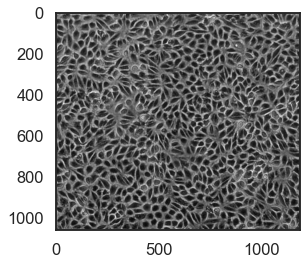

In [4]:
plt.imshow(pic, cmap = 'gray');

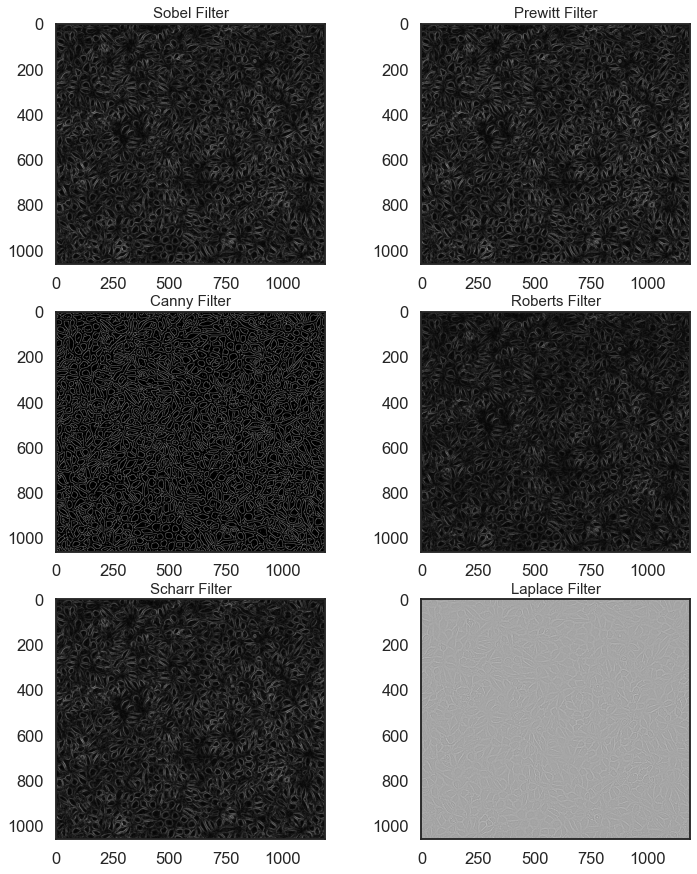

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=2,
                         figsize=(12, 15))
sob = ski.filters.sobel(pic)
rob = ski.filters.roberts(pic)
prew = ski.filters.prewitt(pic)
can = ski.feature.canny(pic,sigma=3)
sch = ski.filters.scharr(pic)
lap = ski.filters.laplace(pic,ksize=5)
ax[0,0].imshow(sob, cmap = 'gray'); ax[0,0].set_title("Sobel Filter",fontsize = 15)
ax[0,1].imshow(prew, cmap = 'gray'); ax[0,1].set_title("Prewitt Filter",fontsize = 15)
ax[1,0].imshow(can, cmap = 'gray'); ax[1,0].set_title("Canny Filter",fontsize = 15)
ax[1,1].imshow(rob, cmap = 'gray'); ax[1,1].set_title("Roberts Filter",fontsize = 15)
ax[2,0].imshow(sch, cmap = 'gray'); ax[2,0].set_title("Scharr Filter",fontsize = 15)
ax[2,1].imshow(lap, cmap = 'gray'); ax[2,1].set_title("Laplace Filter",fontsize = 15)
plt.savefig(figfile+"edge_detection_cells.png",dpi=300)
plt.show();

# 7.3 
## Hough Transform for Lines

Generate image with lines.

In [6]:
#generate lines
pic3 = np.zeros([100,100])
r,c,v = ski.draw.line_aa(50,30,70,70)
r1,c1,v1 = ski.draw.line_aa(80,30,55,70)
pic3[r,c] = v
pic3[r1,c1] = v1

Get the Hough transform and plot it.

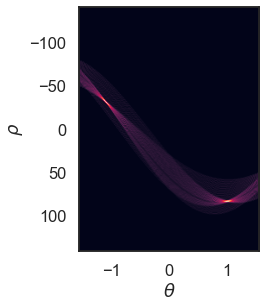

In [7]:
#get line parameters from hough transform
h, theta, d = ski.transform.hough_line(pic3)
fig,ax = plt.subplots(figsize=(4.5,4.5))
ax.imshow(h, extent=[theta[0],theta[-1],d[-1],d[0]]);
ax.set_aspect(0.015)
ax.set_xlabel('$\\theta$'); 
ax.set_ylabel('$\\rho$');
plt.savefig(figfile+'hough_transform_lines.png',dpi=300)

Two peaks indicate 2 lines as we expect. Get the brightest peaks and plot the lines with values of $\rho$, $\theta$ corresponding to the peaks.

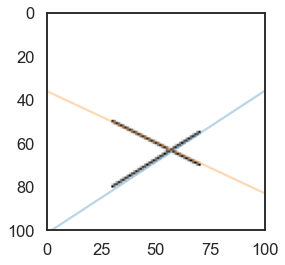

In [8]:
#plot image
plt.imshow(pic3, cmap='gray_r')

#find origin
origin = np.array((0, pic3.shape[1]))
#plot lines
for _, angle, dist in zip(*ski.transform.hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle))/np.sin(angle)
    plt.plot(origin, (y0, y1), alpha = 0.3)
plt.xlim(origin)
plt.ylim((pic3.shape[0], 0));
plt.savefig(figfile+'hough_lines_segmented.png',dpi=300)

## Hough Transform for Circles

Get image of circle and threshold it.

In [9]:
pic4_og = img.imread("Images/simRing_1.png").astype('double')
thresh = ski.filters.threshold_otsu(pic4_og) 
pic4 = anl.thresher(pic4_og,thresh) #threshold

Get Hough accumulator images for radii ranging from 20-30px and plot them.

In [10]:
hough_radii = np.arange(20,31,1)
hough_acc = ski.transform.hough_circle(pic4, hough_radii)
fig = plt.figure(figsize = (4.5,4.5)); ax = plt.axes()
camera = Camera(fig)
for i,r in enumerate(hough_radii):
    plt.imshow(hough_acc[i,:,:])
    plt.text(0,-5,'R = '+str(r)+'px',fontsize = 15)
    camera.snap()
plt.close()

In [11]:
animation = camera.animate()
animation.save(figfile+"hough_accumulators_circle.gif",writer="imagemagick",fps = 10,dpi=300)
animation

Get the brightest peak from the hough accumulators and plot the circle.

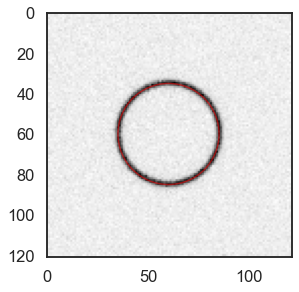

x =  [60] | y =  [60] | r =  [25]


In [12]:
fig, ax = plt.subplots(figsize = (4.5,4.5))
#plot the original image
plt.imshow(pic4_og, cmap = 'gray_r')

#get the brightest peak from the accumulators
_, cx, cy, rads = ski.transform.hough_circle_peaks(hough_acc,hough_radii,total_num_peaks = 1)

#plot segmented circle
for center_y, center_x, radius in zip(cy, cx, rads):
    circ = plt.Circle((center_x,center_y),radius,color='r',fill=False,alpha=0.5)
    ax.add_artist(circ)
ax.set_xlim((0,np.shape(pic4)[1]))
ax.set_ylim((np.shape(pic4)[0],0))
plt.savefig(figfile+'hough_circle_1_segmented.png',dpi=300)
plt.show()
print('x = ',cx,'| y = ',cy,'| r = ',rads);

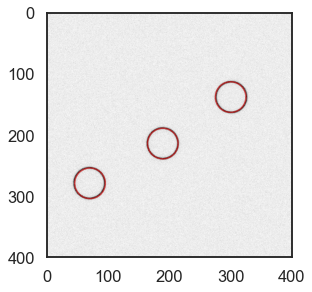

x =  [300 189  70] | y =  [138 214 279] | r =  [25 25 25]


In [13]:
#get image with 3 circles
fig, ax = plt.subplots(figsize = (4.5,4.5))
pic5_og = img.imread("Images/simRing_threeRings.png").astype('double')
thresh = ski.filters.threshold_otsu(pic5_og) 
pic5 = anl.thresher(pic5_og,thresh) #threshold
plt.imshow(pic5_og,cmap='gray_r')

#get accumulators
hough_radii = np.array([25])
hough_acc = ski.transform.hough_circle(pic5, hough_radii)

#get the 3 brightest peaks in the stack of hough accumulators
_, cx, cy, radii = ski.transform.hough_circle_peaks(hough_acc, hough_radii, num_peaks = 3)

#plot the segmented circles
for center_y, center_x, radius in zip(cy, cx, radii):
    circ = plt.Circle((center_x,center_y),radius,color='r',fill=False,alpha=0.5)
    ax.add_artist(circ)
ax.set_xlim((0,np.shape(pic5)[1]))
ax.set_ylim((np.shape(pic5)[0],0))
plt.savefig(figfile+'hough_three_circles_segmented.png',dpi=300)
plt.show()
print('x = ',cx,'| y = ',cy,'| r = ',radii);